# P419 10 NumPy. Массивы I

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL:

+ [PythonWorld: NumPy](https://pythonworld.ru/numpy)

+ [ХАБР: NumPy, пособие для новичков](https://habr.com/post/121031/)

Дата последнего обновления: **14.11.2018**

<a id='up'></a>
### План

1. **[Модуль numpy](#numpy)**
    
2. **[Массивы](#arrays)**
    + [создание массивов](#create);
    + [numpy.ndarrays](#ndarrays);
    + [reshape - изменения формы массива](#reshape);
    + [cоздание "плоского" массива из N-мерного](#flatten)

3. **[Операции с массивами](#array_opers)**
    + [индексация элементов массивов](#index)
    + [cрезы массивов](#slice);
    + [векторные срезы](#fancy_slice);
    + [арифметические операции с массивами](#oper);
    + [логические операции с массивами](#logic);

4. **[Запись числовых массивов](#wrarray)**
    + [numpy.save](#save);
    + [numpy.savetxt](#savetxt);
    + [numpy.savez](#savez)
    + [numpy.savez_compressed](#savez_compressed)
    
5. **[Чтение числовых массивов](#rdarray)**
    + [numpy.load](#load);    
    + [numpy.genfromtxt](#genfromtxt)
    
### Цель: 

+ изучить массивы - особые типы данных в python из модуля numpy, которые особенно эффективны для работы с числовыми данными

<a id='numpy'></a>
## Модуль numpy
[Вверх](#up)

[NumPy](http://www.scipy.org/scipylib/download.html) — это расширение языка Python, добавляющее поддержку больших многомерных массивов и матриц, вместе с [большой библиотекой высокоуровневых математических функций](http://pythonworld.ru/numpy) для операций с этими массивами.

Краткий список возможностей numpy по категориям:

+ Array creation routines
+ Array manipulation routines
+ Discrete Fourier Transform
+ Indexing routines
+ Input and output
+ Linear algebra
+ Masked array operations
+ Mathematical functions
+ Polynomials
+ Random sampling (numpy.random)
+ Sorting, searching, and counting
+ Statistics

Стандартным способом импортирования модуля numpy является:

> **import numpy as np**

Здесь использован импорт с сокращением вместо полного имени модуля `numpy` до короткого `np`. После этого доступ к функциям осуществляется через аббревиатуру.

<a id='arrays'></a>
## Массивы
[Вверх](#up)

Центральным объектом, вокруг которого строится большинство функций библиотеки `numpy` - это особый типа данных, называющийся `numpy.ndarrays`, т.е. N-мерный массив или просто массив.

**Массивы - упорядоченные последовательности ОДНОТИПНЫХ данных.**

Массивы характеризуются:

1. **тип элементов массива (dtype)**;

2. **формой (shape)**;

3. **числом измерения (axis / dimensions, ndim)**;

4. **размером (size)**.

**Тип данных** - это тип данных элементов массива. Т.к. массив - это упорядоченная совокупность однотипных данных по определению, то тип данных един для всех элементов массива. Тип данных задаётся атрибутов dtype и может быть вызван от имени массива через одноимённый метод **.dtype**. Чаще всего `dtype` отражает числовые типы данных, но необязательно (например, логически массивы, состояющие из True/False).



**Форма** - это кортеж, состоящий из целых чисел, где каждое значение определяет число элементов по выбранной оси или измерению в массиве. Форму массива можно узнать через метод **arr.shape** или через функцию **np.shape(arr)**. 

**Число измерений (axis)** - это число осей, ранг, размерность массива. Длина кортежа и число осей должны совпадать. Оси нумеруются также с нуля.

**Размер** - это общее число элементов, содержащееся в массиве. Размер равен произведению длин всех измерений. Так для массива с формой (3, 4, 2) размер будет равен 24.

Форма может состоять из одного числа. Тогда число осей для такого массива будет равно единице. Такие массивы часто называются **одномерными массивами** или **векторами**.

В случае, когда число осей **ndim**(метод массива) равно двум, тогда он называется двумерным или матрицей (для чисел). В случае более высоких порядков (3 и более) говорят о многомерных массивах. Т.о. число осей определяет N-мерность массива.

![caption](files/pictures/anatomyarrayrus.png "Рисунок 1 Шпаргалка по массивам в numpy")

In [1]:
import numpy as np

x = np.arange(12)   # похоже на list(range(12))

box = [x.size, x.shape, x.ndim, x.dtype]
print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

Size=12 Shape=(12,) Ndim=1 Dtype=int32


<a id='create'></a>
### Cоздание массивов
[Вверх](#up)

В **numpy** есть функции, похожие на функции стандартной библиотеки, для создания массивов заданного наполнения и формы.

+ **numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)** - позволяет получить массив, состоящий из равномерно распределённых в заданом интервале значений. Опционально верхняя граница интервала может быть исключена из рассмотрения (параметр endpoint=False);

+ **numpy.arange([start,] stop[, step,], dtype = None)** - функция, похожая на range(). Позволяет получать последовательность как целых, так и действительных чисел, используя конструктор "начальное значение, конечное значение, шаг" ;

+ **numpy.random.random(shape)** - возвращает массив заданной формы, состоящий из псевдослучайных чисел в интервале [0, 1) не включая единицу;

+ **numpy.random.randint(shape)** - возвращает массив заданной формы, состоящий из псевдослучайных чисел в интервале [0, 1) не включая единицу;

+ **numpy.zeros(shape)** - возвращает массив заданной формы, состоящий из нулей (0);

+ **numpy.ones(shape)** - возвращает массив заданной формы, состоящий из единиц (1);

+ **numpy.eye(L)** - возвращает единичную (очевидно, квадратную) матрицу заданной длины L;

+ **numpy.full(shape, const)** - возвращает массив заданной формы с постоянным значением.


In [2]:
# Некоторые функции numpy для создания массивов

import numpy as np

# linspace()
x1 = np.linspace(0, 10, 50)
x2 = np.linspace(0, 10, 50, endpoint=False)

# arange()
x1 = np.arange(50, dtype='float')
x2 = np.arange(-10.5, 30.75, 2.7)

# random.random()
x1 = np.random.random(50)
x2 = np.random.random((10, 7, 2))  # можно сразу задать форму массива

# zeros()
x1 = np.zeros(50, dtype=int)
x2 = np.zeros((10, 4, 2, 4))   # можно сразу задать форму массива

# ones()
x1 = np.ones(50)
x2 = np.ones((10, 24), dtype=int)

# full() & eye()
x1 = np.full((14, 7), -99)
x1 = np.eye(10)

<a id='ndarrays'></a>
### numpy.ndarrays
[Вверх](#up)

Помимо этих функций, есть функция `numpy.array(lst)`, которая позволяет явно преобразовать однотипную последовательность к типу массивов. Это могут быть списки, кортежи, множества, например. 

+ **numpy.array(lst)**

In [3]:
import numpy as np

x = list(range(12))
xa = np.array(x)

box = [xa.size, xa.shape, xa.ndim, xa.dtype]
print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

Size=12 Shape=(12,) Ndim=1 Dtype=int32


In [4]:
import numpy as np

y = [[1, 2, 4], [2, 4, 0], [1, 1, -1]]
ya = np.array(y)

box = [ya.size, ya.shape, ya.ndim, ya.dtype]
print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

Size=9 Shape=(3, 3) Ndim=2 Dtype=int32


In [5]:
import numpy as np

x = np.arange(6)
print(type(x))

<class 'numpy.ndarray'>


<a id='reshape'></a>
### reshape - изменения формы массива
[Вверх](#up)

Изменить форму массива позволяет метод массивов **.reshape()** или функция reshape модуля **numpy.reshape()**. 

Правило именения формы: существующую ось можно разбить на несколько новых только нацело. То есть ось длиной 12 можно разбить на

1. (1,12) - тривиальное преобразование (вектор-столбец)
2. (2,6)
3. (3,4)
4. (4,3)
5. (6,2)
6. (12,1) - аналогичное тривиальное преобразование (вектор-строка)

In [6]:
# Numpy

import random
import numpy as np

shapes = [(1,12), (2,6), (3,4), (4,3), (6,2), (12,1)]

a = np.arange(12)   # аналог стандартному range

print('Origin Size={} Shape={} Ndim={}'.format(a.size, a.shape, a.ndim))

for i, sh in enumerate(shapes):

    if i % 2 == 0:
        y = a.reshape(sh)
    else:
        y = np.reshape(a, sh)
        
    print(i)
    print('Size={} Shape={} Ndim={}'.format(y.size, y.shape, y.ndim))
    print(y)


Origin Size=12 Shape=(12,) Ndim=1
0
Size=12 Shape=(1, 12) Ndim=2
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
1
Size=12 Shape=(2, 6) Ndim=2
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
2
Size=12 Shape=(3, 4) Ndim=2
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
3
Size=12 Shape=(4, 3) Ndim=2
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
4
Size=12 Shape=(6, 2) Ndim=2
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
5
Size=12 Shape=(12, 1) Ndim=2
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


Очевидно, что (2, 6) и (6, 2) - это разные формы. 

Т.о. каждую ось можно разбить на несколько других. При этом следует помнить, что преобразуя одномерный ряд в двумерный массив (или вектор в матрицу), указывайте число "столбцов" вторым элементом, а количество "строк" - первым.

In [7]:
# Более сложные примеры reshape
import numpy as np

N = 24
shape1 = (4, 3, 2)   # кортеж
a = np.arange(N).reshape(shape1)   # сразу меняем форму массиву длины N
print(a.shape)
print(a)

(4, 3, 2)
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


<a id='flatten'></a>
### Создание "плоского" массива из N-мерного
[Вверх](#up)

Для "выпрямления" N-мерного массива в вектор есть несколько способов:

+ метод массивов **flatten()**

+ метод массивов **ravel()** или функция **numpy.ravel()**

In [8]:
import numpy as np

sh = (4, 3, 5)   # кортеж
a = np.random.randint(-50, 50, sh)  # сразу меняем форму массиву длины N
print('Origin a with shape {}'.format(a.shape))
print(a)

# "Выравнивание" N-мерного массива в одномерный
fa1 = a.flatten()
fa3 = a.ravel()

for i, fa in enumerate([fa1, fa3]):
    print(i, 'Flatten array', fa)


Origin a with shape (4, 3, 5)
[[[  0 -23 -29  41 -38]
  [-14 -40  30  -4 -32]
  [ 10  21  -6  29  -3]]

 [[-31  12 -24 -46 -20]
  [ -6  37 -28  47 -40]
  [ 45 -13   9  33  39]]

 [[  8 -17  10 -19  41]
  [-12 -41 -40 -37  28]
  [ 35  -7  14  21 -50]]

 [[  5  14 -28  46  21]
  [ 11  -7  31 -17  -7]
  [-49  36 -49  22   4]]]
0 Flatten array [  0 -23 -29  41 -38 -14 -40  30  -4 -32  10  21  -6  29  -3 -31  12 -24
 -46 -20  -6  37 -28  47 -40  45 -13   9  33  39   8 -17  10 -19  41 -12
 -41 -40 -37  28  35  -7  14  21 -50   5  14 -28  46  21  11  -7  31 -17
  -7 -49  36 -49  22   4]
1 Flatten array [  0 -23 -29  41 -38 -14 -40  30  -4 -32  10  21  -6  29  -3 -31  12 -24
 -46 -20  -6  37 -28  47 -40  45 -13   9  33  39   8 -17  10 -19  41 -12
 -41 -40 -37  28  35  -7  14  21 -50   5  14 -28  46  21  11  -7  31 -17
  -7 -49  36 -49  22   4]


Не забываем, что массив - ИЗМЕНЯЕМЫЙ (mutable) тип данных!

Разница методов **ravel()** (в т.ч. и **np.ravel()**) и **flatten()** состоит в том, что **flatten()** возвращает глубокую КОПИЮ массива в плоском виде, а ravel остаётся связанным с исходным массивом. Если исходный массив изменится, изменится и переменная, полученная через ravel (и наоборот, при изменении вектора, полученного с помощью ravel, изменится и исходный массив). 

In [9]:
# Пример разницы между методами ravel() и flatten()

import numpy as np

sh = (4, 3, 5)   # кортеж
a = np.random.randint(-50, 50, sh)  # сразу меняем форму массиву длины N

# "Выравнивание" N-мерного массива в одномерный
fa1 = a.flatten()
fa3 = a.ravel()

fa1[-1] = 777
print('Nothing wrong with a', a)

fa3[-1] = 777
print('Oups ... sorry a', a)

a[3, 1, 3] = -10000
print(fa1 - fa3)

Nothing wrong with a [[[-16  27  21  12   4]
  [-10  49 -14 -20  -5]
  [ 30   0  41 -42  41]]

 [[  6  12 -50   8  -2]
  [ 26  44 -41  40  -8]
  [-44   1 -39 -12  10]]

 [[-15 -15 -22  46 -50]
  [ 23  16   4  44   6]
  [-46  12  25   6 -11]]

 [[-45  33  -7  10 -26]
  [-33  34  14 -27  22]
  [-15  -2   0  -8  25]]]
Oups ... sorry a [[[-16  27  21  12   4]
  [-10  49 -14 -20  -5]
  [ 30   0  41 -42  41]]

 [[  6  12 -50   8  -2]
  [ 26  44 -41  40  -8]
  [-44   1 -39 -12  10]]

 [[-15 -15 -22  46 -50]
  [ 23  16   4  44   6]
  [-46  12  25   6 -11]]

 [[-45  33  -7  10 -26]
  [-33  34  14 -27  22]
  [-15  -2   0  -8 777]]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 9973    0    0
    0    0    0    0]


<a id='array_opers'></a>
## Операции с массивами
[Вверх](#up)

В отличие от списков, массивы по-другому ведут себя даже в самых базовых операциях (сложение, умножение).

Так умножение массива на число приведёт к тому, что каждый элемент массива будет умножен на это число. При этом исходный массив не изменяется.

Также от массива можно брать не только **срезы**, но и **векторные срезы** (они же *fancy slices*), т.е. непоследовательные наборы индексов по соответствующим осям. Такие наборы должны быть оформлены как списки или кортежи.

<a id='slice'></a>
### Индексация элементов массивов
[Вверх](#up)

Одна из главных особенностей массивов, позволяющая им эффективно работать с числовыми данными, является гибкая поддержка индексации, т.е. возможности обращаться к элементам и группам элементов (строки, столбцы, срезы и т.д.) массива с помощью набора целых чисел-индексов.

Синтаксис индексации элементов массива почти не отличается от синтаксиса индексации списков: целочисленные значения задаются в квадратных скобках от имени переменной массива.



In [10]:
import numpy as np

x = np.arange(12)
print(x[0], x[-1], x[11])

0 11 11


Как и в случае многомерных списков (а массивы можно рассматривать как одну из реализаций многомерных списков с равным количеством однотипных элементов в каждом вложенном уровне), для обращения к элементу N-мерного массива, нужно указать N индексов в квадратных скобках. Первая цифра будет соответствовать нулевой оси (axis 0), вторая - первой оси (axis 1) и т.д.

В случае N-мерного массива обратиться к элементам можно аж тремя способами:

+ **b[2, 3]** - обращение через оси массива (запятая тут отделяет оси);

+ **b[(2,3)]** - обращение через кортеж;

+ **b[2][3]** - синтаксис вложенных списков;

In [11]:
import numpy as np

sh = (4, 8, 6)   # кортеж
a = np.random.randint(0, 200, sh)  # сразу меняем форму массиву длины N

b1 = a[2, 4, 5]
b2 = a[(2, 4, 5)]
b3 = a[2][4][5]   # синтаксис вложенных списков

for b in (b1, b2, b3):
    print(b)

76
76
76


<a id='slice'></a>
### Срезы массивов
[Вверх](#up)

Срезы в массивах работают также как и у списков, т.е. элемент второго индекса (правый) не будет включён в срез.

In [12]:
import numpy as np

a = np.arange(1, 13)
sa = a[3:7]
print('Элементы с индексами 3 4 5 6 ', sa)

Элементы с индексами 3 4 5 6  [4 5 6 7]


В случае N-мерного массива срезы можно использовать от каждой оси массива отдельно! Так в случае двумерного массива чтобы взять срез можно использовать следующие способы:
    
1. **b[slice0, slice1]**   # Рекомендуется использовать именно такой способ

2. **b[slice0][slice1]** 

> Настоятельно рекомендуется использовать только **первый способ a[i, j]** для взятия срезов. Такой синтаксис явно даёт понять, что объект b является массивом, а не списком!

In [13]:
import numpy as np

a = np.arange(1, 25).reshape((6, 4))
b1 = a[:4, :] 
b3 = a[:4][:]

print(b1 - b3)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Не забываем, что срезы даже вдоль всего одной оси массива можно сформировать очень по-разному. И такое многообразие вариантов может быть применено к любой из осей массива! Это позволяет очень гибко выбирать данные из массивов (по сравнению с вложенными списками, где размер списков мог быть разным вдоль даже одного уровня вложенности)!

In [14]:
# Много срезов

import numpy as np

box = list(range(1, 13))
arr = np.array(box)

pool = []
for j, seq in enumerate([box, arr]):
    pool.append(seq[3:])  # срез
    pool.append(seq[:5])  # и это срез
    pool.append(seq[2:8])  # тоже срез
    pool.append(seq[2:8:2])  # опять срез
    pool.append(seq[-8:-1])  # кажется это срез
    pool.append(seq[1::3])  # ну и это срез
    pool.append(seq[-2:-10:-1])  # отрицательная индексация - тоже срез
    pool.append(seq[-1:-12:-2])  # и снова срез
    pool.append(seq[-8:-2:1])  # наверняка это тоже срез!
    
for i, s in enumerate(pool):
    if i == 9:
        print('')
    print(i, s)


0 [4, 5, 6, 7, 8, 9, 10, 11, 12]
1 [1, 2, 3, 4, 5]
2 [3, 4, 5, 6, 7, 8]
3 [3, 5, 7]
4 [5, 6, 7, 8, 9, 10, 11]
5 [2, 5, 8, 11]
6 [11, 10, 9, 8, 7, 6, 5, 4]
7 [12, 10, 8, 6, 4, 2]
8 [5, 6, 7, 8, 9, 10]

9 [ 4  5  6  7  8  9 10 11 12]
10 [1 2 3 4 5]
11 [3 4 5 6 7 8]
12 [3 5 7]
13 [ 5  6  7  8  9 10 11]
14 [ 2  5  8 11]
15 [11 10  9  8  7  6  5  4]
16 [12 10  8  6  4  2]
17 [ 5  6  7  8  9 10]


<a id='fancy_slice'></a>
### Векторные срезы
[Вверх](#up)

Помимо обычных срезов, которые представляют собой последовательности с регулярным шагом (единичным или другим), массивы (**в отличие от списков!**) поддерживают ещё и т.н. `векторные срезы`. Иногда такой срез называют `fancy slicing`.

Поддержка массивами векторных срезов позволяет: 

+ гибко выбирать данные используя логические условия (arr[arr > 5]);

+ использовать списки/массивы целых чисел (с нерегулярным шагом, с повторами и в несортированном виде) при взятии срезов от массивов.

In [15]:
import numpy as np

box = list(range(1, 13))
arr = np.array(box)

ii = [0, 4, 5, 7]
jj = np.array([0, 7, 4, 0])

a1 = arr[arr > 5]
a2 = arr[ii]
a3 = arr[jj]

for a in [a1, a2, a3]:
    print(a)

[ 6  7  8  9 10 11 12]
[1 5 6 8]
[1 8 5 1]


Для списков вектоные срезы не работают!

In [16]:
import numpy as np

box = list(range(1, 13))

ii = [0, 4, 5, 7]

try:
    box[ii]
except:
    print('Списки не поддерживают векторные срезы!')
    
try:
    box[box > 5]
except:
    print('Списки не поддерживают векторные срезы!')

Списки не поддерживают векторные срезы!
Списки не поддерживают векторные срезы!


<a id='oper'></a>
### Арифметические операции с массивами
[Вверх](#up)

(Используя перегрузку операторов) массивы numpy при арифметических операциях ведут себя не так, как списки.

При арифметических операциях массива с числом, результат будет применён к каждому элементу массива: например, при умножении массива на действительное числ0, каждый элемент массива будет умножен на это число. При этом исходный массив не изменяется.

In [17]:
import numpy as np

brr = np.arange(12)

b0 = brr + 1
b1 = brr - 2.5
b2 = brr * 2
b3 = brr / 2*np.pi
b4 = brr ** 3
b5 = brr % 2
b6 = brr // 3

for i, b in enumerate([b0, b1, b2, b3, b4, b5, b6]):
    print(i, b)

0 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1 [-2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]
2 [ 0  2  4  6  8 10 12 14 16 18 20 22]
3 [ 0.          1.57079633  3.14159265  4.71238898  6.28318531  7.85398163
  9.42477796 10.99557429 12.56637061 14.13716694 15.70796327 17.27875959]
4 [   0    1    8   27   64  125  216  343  512  729 1000 1331]
5 [0 1 0 1 0 1 0 1 0 1 0 1]
6 [0 0 0 1 1 1 2 2 2 3 3 3]


В случае взаимодействия массивов друг с другом, операции также будут поэлементные, но такая операция может быть выполнена только для массивов одинаковой формы.

In [18]:
import numpy as np

N = 12
arr = np.arange(N)
brr = np.array([-1 if (s % 2 == 0) else 1 for s in range(N)])

print(arr)
print(brr)
               
res = arr*brr
print(res)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[-1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
[  0   1  -2   3  -4   5  -6   7  -8   9 -10  11]


В случае, когда нужно применить вектор с какой-то операцией к каким-то частям массива (вектор к строкам или вектор к столбцам), также следует привести вектор к форме массива и применить операцию.

Например, необходимо провести нормализацию двумерного массива, т.е. вычесть среднее j-го столбца из каждого значения j-го столбца, а затем поделить каждый элемент j-го столбца на стандартное отклонение j-го столбца. Такая задача сводится к расчёту средней оценки и стандартного отклонения для каждого столбца, расширении полуенных векторов на двумерного массива и последовательного вычитания и деления двух массивов. 

In [19]:
import numpy as np

def z_transfer0(x):
    '''
    Fisher's z-transformation. Normalization using axis=0 (N)
    
    ### INPUT
    x - 2D array (N, M)
    
    ### OUTPUT
    xz - 2D array (N, M)
    '''
    
    xm = x.mean(axis=0)
    xxm = np.ones((x.shape[0], 1)) * xm

    xs = x.std(axis=0)
    xxs = np.ones((x.shape[0], 1)) * xs

    xz = (x - xxm) / xxs
    
    return xz

sh = (5, 4)
x = np.arange(1, 21).reshape(sh)
xz = z_transfer0(x)
print(xz)


[[-1.41421356 -1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356  1.41421356]]


> **МНЕМОНИЧЕСКОЕ ПРАВИЛО**: если в форме массива закрыть пальцем значение оси, то результатом любой универсальной функции numpy будет объект с формой из оставшихся значений (слева направо). Это универсально для любой оси. 

Т.е. если для массива с формой (400, 30, 50) требуется применить функцию по оси X, то форма объекта в результате работы универсальной функции numpy (np.max, np.mean, np.std и др.) будет такой:

+ оси 0 -> (X, 30, 50) -> (30, 50)

+ оси 1 -> (400, X, 50) -> (400, 50)

+ оси 2 -> (400, 30, X) -> (400, 30)

В случае отрицательной индексации:

+ ось -1 -> (400, 30, X) -> (400, 30)

+ ось -2 -> (400, X, 50) -> (400, 50)

+ ось -3 -> (X, 30, 50) -> (30, 50)

In [20]:
import numpy as np

sh = (10, 3, 4)
x = np.arange(120).reshape(sh)
print('Origin shape {}'.format(x.shape))

a0 = np.max(x, axis=0)
a1 = np.mean(x, axis=1)
a2 = np.median(x, axis=2)

abox = [a0, a1, a2]
for i, a in enumerate(abox):
    print('axis {} -> shape {}'.format(i, a.shape))

Origin shape (10, 3, 4)
axis 0 -> shape (3, 4)
axis 1 -> shape (10, 4)
axis 2 -> shape (10, 3)


<a id='logic'></a>
### Логические операции с массивами
[Вверх](#up)    

С логическими операциями всё также - они применяются поэлементно. Результатом таких операций являются массивы, состоящие из булевых переменных. Такие логические массивы можно использовать как **логические маски** для выбора данных.

Массивы могут принимать логические маски в качестве срезов и возвращать только **True** значения.

> Логические маски можно инверсировать (т.е. все False станут True и наоборот) с помощью знака "~" (тильда) перед именем переменной логической маски

In [21]:
import numpy as np

arr = np.arange(-12, 13)
mask = arr > 5
new = arr[mask]

inv_mask = ~mask   # тильда! Инверсия логической маски

print(type(mask))
print(f'Логическая маска {mask}')
print(f'Инверсированная логическая маска {inv_mask}')

print(new)

<class 'numpy.ndarray'>
Логическая маска [False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True]
Инверсированная логическая маска [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False]
[ 6  7  8  9 10 11 12]


Если есть необходимость объединить несколько логических условий, относящихся к элементам массива, то нужно применять т.н. **побитовые логические операции**:

+ **and заменяется на &**

+ **or заменяется на |**

In [22]:
import numpy as np

arr = np.arange(-12, 13)
mask = (arr > 5) | (arr < -3)   # побитовое логическое ИЛИ
mask2 = (arr > -6) & (arr <= 0)   # побитовое логическое И

new = arr[mask]
new2 = arr[mask2]

print('mask', mask)
print(new2)

print('mask2', mask2)
print(new)

mask [ True  True  True  True  True  True  True  True  True False False False
 False False False False False False  True  True  True  True  True  True
  True]
[-5 -4 -3 -2 -1  0]
mask2 [False False False False False False False  True  True  True  True  True
  True False False False False False False False False False False False
 False]
[-12 -11 -10  -9  -8  -7  -6  -5  -4   6   7   8   9  10  11  12]


В случае логических операций между массивами (в т.ч. и N-мерного с одномерными) такая операция может быть выполнена только для массивов одинаковой формы. Результатом будет массив из логических переменных.

Часто в таких случаях используются функции **np.all** и **np.any**, которые позволяют оценить соотношение `True` и `False` значений для всех элементов массива (all) или хотя бы одного (any).

In [23]:
import numpy as np

arr = np.arange(-12, 13)
brr = np.arange(-10, 15)

mask = (brr > arr)   # сравнение
res1 = np.all(mask)
print(f'Все элементы массива brr больше соответсвующих элементов arr >>> {res1}')
res2 = np.any(~mask)  # ТИЛЬДА!!!! ИНВЕРСИЯ ЛОГИЧЕСКОЙ МАСКИ!!!
print(f'Хотя бы один элемент массива arr больше соответсвующих элементов brr >>> {res2}')

Все элементы массива brr больше соответсвующих элементов arr >>> True
Хотя бы один элемент массива arr больше соответсвующих элементов brr >>> False


In [24]:
import numpy as np

arr = np.arange(-12, 13)
mask = (arr > -99)   # побитовое логическое ИЛИ
mask2 = (arr > -6) & (arr <= 0)   # побитовое логическое И

res1 = np.all(mask)
print(f'Все элементы больше -99 >>> {res1}')
res2 = np.any(mask2)
print(f'Хотя бы один элемент массива попадает в интервал (-6, 0] >>> {res2}')

Все элементы больше -99 >>> True
Хотя бы один элемент массива попадает в интервал (-6, 0] >>> True


<a id='wrarray'></a>
## Запись числовых массивов
[Вверх](#up)

В numpy существует несколько удобных функций и методов для сохранения данных массивов в виде файлов (как текстовых, так и компактных бинарных):

+ **numpy.save()** - позволяет сохранить массив в формате **npy**, который достаточно компактный, но главное - он сохраняет форму массива при обратном чтении!;

+ **numpy.savetxt()** - позволяет сохранить данные массива (ndim < 3) в текстовом виде (не компактно, но видно "на глаз");

+ **numpy.savez()** - позволяет сохранить несколько массивов в один файл в **несжатом** формате `.npz`;

+ **numpy.savez_compressed()** -  - позволяет сохранить несколько массивов в один файл в **сжатом** формате `.npz`.

<a id='save'></a>
## numpy.save
[Вверх](#up)


In [25]:
import numpy as np

sh = (73, 144)
arr = np.random.random(sh)*10

fileName = 'arr'
try:
    np.save(fileName, arr)
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')


Файл "arr" был успешно записан!


<a id='savetxt'></a>
### numpy.savetxt
[Вверх](#up)

Для записи данных массива в текстовый файл есть функция **numpy.savetxt()**.

> **N.B.** При записи числовых данных рекомендуется использовать `разделитель`. Например, **точка с запятой (;)**. > Разделитель задаётся аргументом **delimiter** (по умолчанию разделитель - это пробел). 

В модуле `pandas` аргумент, отвечающий за разделитель, называется **sep**.

Наличие явного разделителя позволяет просто открыть такой текстовый файл в MS Excel.

In [26]:
import numpy as np

sh = (73, 144)
arr = np.random.random(sh)*10

fileName = 'arr.txt'
try:
    np.savetxt(fileName, arr, delimiter=';')
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')

Файл "arr.txt" был успешно записан!


Можно добиться значительно более компактного хранения данных, если задать точность (число значимых цифр после плавающей запятой) для действительных чисел. Точность можно задать с помощью аргумента **fmt**.

In [27]:
import numpy as np

sh = (73, 144)
arr = np.random.random(sh)*10

fileName = 'arr_fmt2.txt'
try:
    np.savetxt(fileName, arr, delimiter=';', 
               fmt='%.2f')   # два знака после запятой для типа float
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')

Файл "arr_fmt2.txt" был успешно записан!


Если данные массива - целые числа, то имеет смысл указать в аргументе **fmt** формат целых чисел. Длина файла здесь определяется набором чисел (единицы занимают меньше места, чем 200)

In [28]:
import numpy as np

sh = (73, 144)
arr = np.ones(sh[0]*sh[1]).reshape(sh) + 200

fileName = 'arr_int.txt'
try:
    np.savetxt(fileName, arr, fmt='%d')
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')

Файл "arr_int.txt" был успешно записан!


<a id='savez'></a>
###  numpy.savez
[Вверх](#up)

In [29]:
import numpy as np

sh = (73, 144)
arr = np.random.random(sh)*10
arr2 = np.arange(200) - 50.

fileName = 'arr_z'
try:
    np.savez(fileName, a=arr, b=arr2)
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')

Файл "arr_z" был успешно записан!


<a id='savez_compressed'></a>
###  numpy.savez_compressed
[Вверх](#up)


In [30]:
import numpy as np

sh = (73, 144)
arr = np.random.random(sh)*10
arr2 = np.arange(200) - 50.

fileName = 'arr_z_comp'
try:
    np.savez_compressed(fileName, a=arr, b=arr2)
    print(f'Файл "{fileName}" был успешно записан!')
except:
    print(f'Ошибка! Файл "{fileName}" не записан!')

Файл "arr_z_comp" был успешно записан!


<a id='rdarray'></a>
## Чтение числовых массивов
[Вверх](#up)

Numpy предоставляет возможность считывать данные в массивы как из текстовых форматов (.dat, .txt, .csv и др.) с помощью функции **numpy.genfromtxt()**, так и из специальных форматов хранения массивов numpy **.npy** и **.npz** (с помощью **numpy.load()**).

+ **numpy.genfromtxt()** - позволяет считать однотипные данные из текстового файла в массив (ndim < 3);

+ **numpy.load()** - позволяет считать однотипные данные из бинарных файла форматов **.npy** и **npz** в виде одного (**.npy**) или нескольких (**.npz**) массивов.

<a id='genfromtxt'></a>
### numpy.genfromtxt
[Вверх](#up)

Для чтения данных текстовых файлов в модуле numpy есть функция **numpy.genfromtxt()**. 

> Её более ранней версией является функция **np.loadtxt()** - явно прслеживается подобие название "load - loadtxt", > "save - savetxt".

In [31]:
# Способы работы с числовыми данными с помощью numpy.genfromtxt(),
# записанными в текстовые файлы

import os
import numpy as np

dataPath = './data'
fileName = [s for s in os.listdir(dataPath) if ('nao' in s) and ('.txt' in s)][0]

ya = np.genfromtxt('{}/{}'.format(dataPath, fileName))

box = [ya.size, ya.shape, ya.ndim, ya.dtype]
print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

x = ya[:, 0]  # первый столбец
y = ya[:, -1]   # последний столбец

Size=2475 Shape=(825, 3) Ndim=2 Dtype=float64


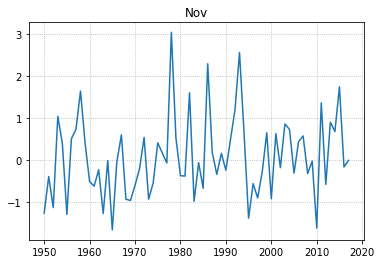

In [32]:
import calendar
import matplotlib.pyplot as plt

monN = 11
m = monN - 1
lab = calendar.month_abbr[monN]

x0 = x[m::12]
y0 = y[m::12]

fig = plt.figure()

plt.plot(x0, y0)
plt.title(lab)
plt.grid(ls=':')
plt.show()

Связка аргументов **usecols** и **unpack** позволяет выбирать избранные столбцы (по индексам столбцов начиная от нуля) с помощью np.genfromtxt(). 

Если исходная таблица (а в текстовом виде можно сохранить только одномерный или двумерный массив) содержит много столбцов, а для анализа нужны лишь некоторые, определённо не стоит считывать и хранить лишнюю информацию.

In [33]:
# Расширенные возможности чтения данных

dataPath = './data'
fileName = [s for s in os.listdir(dataPath) if ('nao' in s) and ('.txt' in s)][0]

fullPath = '{}/{}'.format(dataPath, fileName)
year, mon, nao = np.genfromtxt(fullPath, usecols=[0, 1, 2], unpack=True)

print("NAO type:", type(nao), nao.shape)
print('Max: {:.2f} Min: {:.2f}'.format(nao.max(), nao.min()))
print('Mean:{:.3f} Std: {:.2f}'.format(nao.mean(), nao.std()))

NAO type: <class 'numpy.ndarray'> (825,)
Max: 3.04 Min: -3.18
Mean:-0.001 Std: 1.02


<a id='load'></a>
### numpy.load
[Вверх](#up)

Функция **np.load()** позволяет считывать как формат **.npy**, так и формат **.npz** (compressed и обычный). При этом сохраняется форма массивов!

In [34]:
import os
import numpy as np

ffiles = [s for s in os.listdir(os.getcwd()) if ('.npy' in s)]
f = ffiles[0]

print(f)
# Считываем файл в формате npy. Форма сохраняется!!!
ya = np.load(f)

box = [ya.size, ya.shape, ya.ndim, ya.dtype]
print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

arr.npy
Size=10512 Shape=(73, 144) Ndim=2 Dtype=float64


Файлы формата **.npz** позволяет хранить несколько массивов в одном файле под именами-ключами. Чтобы получить данные из этого формата, нужно считать файл с расширением npz с помощью np.load() в условный объект-файл (на самом деле это класс `"numpy.lib.npyio.NpzFile"`), а затем обратиться от объект-файла по ключу к данным массива. 

Ключ - имя переменной, под которой происходило сохранение в формат npz. Узнать набор ключей в файле ".npz" позволяет атрибут **.files** от условного объект-файла и метод **.keys()** (требует явного преобрзования к какому-либо типу последовательности, например к списку). 

In [35]:
import os
import numpy as np

ffiles = [s for s in os.listdir(os.getcwd()) if ('.npz' in s)]
f1 = ffiles[0]
f2 = ffiles[1]

for i, f in enumerate([f1, f2]):
    npz = np.load(f)
    keys = sorted(list(npz.keys()))
    
    if i == 0:
        word = 'Uncompressed'
        print('There are {} keys in npz'.format(keys))
        print(type(npz))
    else:
        word = 'Compressed'
        
    print(f'npz {word} {f}')
    for val in sorted(npz.files):
        ya = npz[val]
        box = [ya.size, ya.shape, ya.ndim, ya.dtype]
        print('Size={} Shape={} Ndim={} Dtype={}'.format(*box))

There are ['a', 'b'] keys in npz
<class 'numpy.lib.npyio.NpzFile'>
npz Uncompressed arr_z.npz
Size=10512 Shape=(73, 144) Ndim=2 Dtype=float64
Size=200 Shape=(200,) Ndim=1 Dtype=float64
npz Compressed arr_z_comp.npz
Size=10512 Shape=(73, 144) Ndim=2 Dtype=float64
Size=200 Shape=(200,) Ndim=1 Dtype=float64


[Наверх](#up)